In [1]:
# 1. Get essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from vnstock import *

Observations:  1385


<Axes: xlabel='Time'>

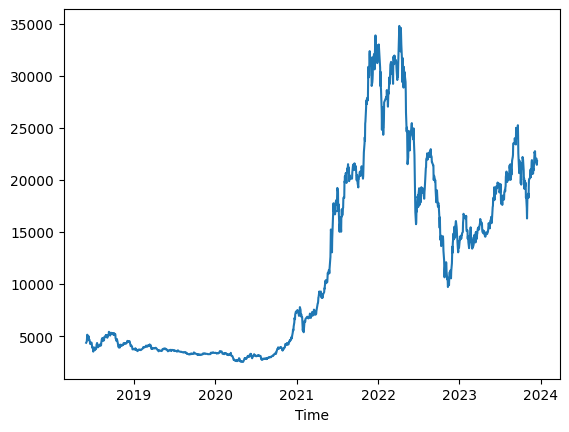

In [2]:
#2. Fetch data and visualize
VND = stock_historical_data(symbol = "VND", start_date="2018-06-01", end_date="2023-12-15", resolution="1D", type = "stock", beautify=True, decor=True, source = "DNSE")
from matplotlib import pyplot
print("Observations: ",len(VND['Close']))
VND
VND["Close"].plot()

In [3]:
VND['Lag'] = np.arange(len(VND.index))
VND = VND[['Close', 'Lag']]
VND

VND = pd.DataFrame(VND)
VND.set_index("Lag", inplace= True)
VND

,Close
Lag,
0,4370
1,4500
2,4810
3,5140
4,4890
...,...
1380,21950
1381,22050
1382,21600


In [5]:
#3. Slit the data into train : test with ratio 8:2
train_size = int(0.7 * len(VND))
test_size = int(0.3 * len(VND))

train_data = VND[:train_size]
test_data = VND[train_size:]

In [6]:
#4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)
y_pred

array([[21053.20561796],
       [21078.07631949],
       [21102.94702102],
       [21127.81772254],
       [21152.68842407],
       [21177.5591256 ],
       [21202.42982713],
       [21227.30052866],
       [21252.17123019],
       [21277.04193171],
       [21301.91263324],
       [21326.78333477],
       [21351.6540363 ],
       [21376.52473783],
       [21401.39543936],
       [21426.26614088],
       [21451.13684241],
       [21476.00754394],
       [21500.87824547],
       [21525.748947  ],
       [21550.61964853],
       [21575.49035006],
       [21600.36105158],
       [21625.23175311],
       [21650.10245464],
       [21674.97315617],
       [21699.8438577 ],
       [21724.71455923],
       [21749.58526075],
       [21774.45596228],
       [21799.32666381],
       [21824.19736534],
       [21849.06806687],
       [21873.9387684 ],
       [21898.80946992],
       [21923.68017145],
       [21948.55087298],
       [21973.42157451],
       [21998.29227604],
       [22023.16297757],


In [8]:
# 6. 60 days prediction
last_index =  VND.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[[31399.41745378]
 [31424.28815531]
 [31449.15885684]
 [31474.02955836]
 [31498.90025989]
 [31523.77096142]
 [31548.64166295]
 [31573.51236448]
 [31598.38306601]
 [31623.25376753]
 [31648.12446906]
 [31672.99517059]
 [31697.86587212]
 [31722.73657365]
 [31747.60727518]
 [31772.47797671]
 [31797.34867823]
 [31822.21937976]
 [31847.09008129]
 [31871.96078282]
 [31896.83148435]
 [31921.70218588]
 [31946.5728874 ]
 [31971.44358893]
 [31996.31429046]
 [32021.18499199]
 [32046.05569352]
 [32070.92639505]
 [32095.79709657]
 [32120.6677981 ]
 [32145.53849963]
 [32170.40920116]
 [32195.27990269]
 [32220.15060422]
 [32245.02130575]
 [32269.89200727]
 [32294.7627088 ]
 [32319.63341033]
 [32344.50411186]
 [32369.37481339]
 [32394.24551492]
 [32419.11621644]
 [32443.98691797]
 [32468.8576195 ]
 [32493.72832103]
 [32518.59902256]
 [32543.46972409]
 [32568.34042561]
 [32593.21112714]
 [32618.08182867]
 [32642.9525302 ]
 [32667.82323173]
 [32692.69393326]

In [9]:
# 7. Evaluation
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 9345.337949432198
Testing MAPE: 52.733804735986986
Testing MAE: 8582.93409583516


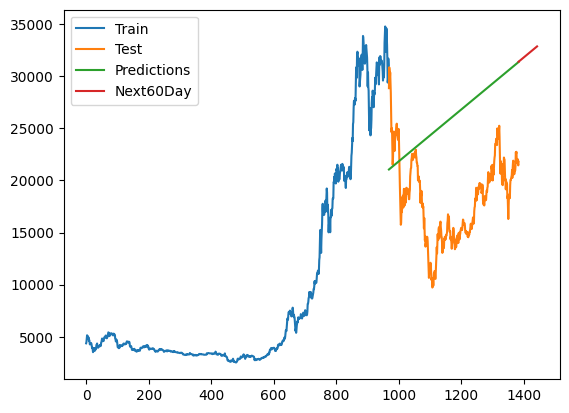

In [10]:
# 8.Visualize the result
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test','Predictions', 'Next60Day'])
plt.show()